### 감시 피하기

+ NxN 크기의복도가 있고, 1x1 크기의 칸으로 나누어지며 특정한 위치에는 선생님, 학생, 장애물이 있음
+ 현재 학생 몇명이 수업시간에 몰래 복도에 나왔는데, 복도에 나온 학생들이 선생님의 감시에 들키지 않는 것이 목표
+ 각 선생님은 자신의 위치에서 상하좌우 4가지 방향으로 감시를 진행
+ 단, 복도에 장애물이 있으면 선생님은 장애물 뒤편에 숨어있는 학생을 볼 수 없음
+ 또한 아무리 멀리 있더라도 장애물로 막히기 전까지 4가지 방향으로 학생을 모두 볼 수 있음
<br>

+ 위칫값을 나타낼 때는 (행,열)의 형태로 표현
+ 각 칸은 선생님은 T, 학생은 S, 장애물은 O로 표시

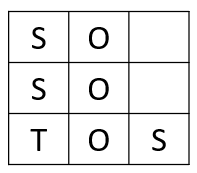

+ 복도가 3x3 크기일때 (3,1)에는 선생님이 존재
+ (1,1),(2,1),(3,3)의 위치에는 학생이 존재
+ (1,2),(2,2),(3,2)의 위치에는 장애물이 존재 
<br>

+ (3,3)의 위치에 존재하는 학생은 장애물 뒤편에 숨어 있기 때문에 감시를 피할 수 있지만,  
  (1,1)과 (2,1)의 위치에 존재하는 학생은 선생님에게 들킴  
<br>

+ 학생들은 복도의 빈칸 중에서 장애물을 설치할 위치를 골라, 정확히 3개의 장애물을 설치해야 함
+ 그리고 장애물을 3개 설치해서 선생님의 감시로부터 모든 학생이 피할 수 있는지 계산해야 함
<br>

+ NxN 크기의 복도에서 학생과 선생님의 위치 정보가 주어졌을 때,   
  장애물을 정확히 3개 설치하여 모든 학생이 선생님의 감시를 피할 수 있는지 출력하는 프로그램 작성하기

**예시**  
+ N=5일 때 장애물을 다음처럼 설정하면 선생님의 감시로부터 모든 학생이 피할 수 있음

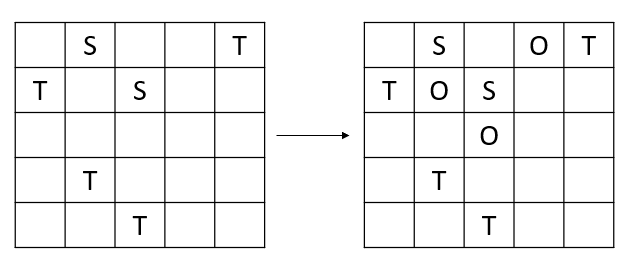

**입력 조건**  
+ 첫째 줄에 자연수 N이 주어짐 (3 <= N <= 6)
+ 둘째 줄에 N개의 줄에 걸쳐서 복도의 정보가 주어짐  
  각 행에서는 N개의 원소가 주어지며, 공백으로 구분  
  해당 위치에 학생이 있다면 S, 선생님이 있다면 T, 아무것도 존재하지 않는다면 X가 주어짐  
  단, 항상 빈칸의 개수는 3개 이상으로 주어짐

**출력 조건**  
+ 첫째 줄에 정확히 3개의 장애물을 설치하여 모든 학생들을 감시로부터 피하도록 할 수 있는지의 여부를 출력
+ 모든 학생들을 감시로부터 피하도록 할 수 있다면 'YES', 그렇지 않다면 'NO'를 출력

**입력 예시 1**  
5  
X S X X T  
T X S X X  
X X X X X  
X T X X X  
X X T X X  

**출력 예시 1**  
YES  

**입력 예시 2**  
4  
S S S T  
X X X X  
X X X X   
T T T X  

**출력 예시 2**   
NO  

In [9]:
from itertools import combinations

n = int(input()) # 복도 크기
board = [] # 복도 정보
teachers = [] # 선생님 위치 정보
spaces = [] # 빈 공간 위치 정보

for i in range(n):
    board.append(list(input().split()))
    for j in range(n):
        if board[i][j] == 'T': # 선생님 위치 저장
            teachers.append((i,j))
        if board[i][j] == 'X': # 빈공간 위치 저장
            spaces.append((i,j))

4
S S S T
X X X X
X X X X
T T T X


In [16]:
teachers

[(0, 3), (3, 0), (3, 1), (3, 2)]

In [12]:
spaces

[(1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3)]

In [17]:
def watch(x, y, direction):
    # 왼쪽방향으로 감시
    if direction == 0:
        while y >= 0:
            if board[x][y] == 'S': # 학생이 있는 경우
                return True
            if board[x][y] == 'O' : # 장애물이 있는 경우
                return False
            y -= 1 # 왼쪽으로 한 칸 이동
    # 오른쪽방향으로 감시
    if direction == 1:
        while y < n:
            if board[x][y] == 'S': # 학생이 있는 경우
                return True
            if board[x][y] == 'O' : # 장애물이 있는 경우
                return False
            y += 1 # 오른쪽으로 한 칸 이동
    # 위쪽 방향으로 감시
    if direction == 2:
        while x >= 0:
            if board[x][y] == 'S': # 학생이 있는 경우
                return True
            if board[x][y] == 'O' : # 장애물이 있는 경우
                return False
            x -= 1   
    # 아래 방향으로 감시
    if direction == 3:
        while x < n:
            if board[x][y] == 'S': # 학생이 있는 경우
                return True
            if board[x][y] == 'O' : # 장애물이 있는 경우
                return False
            x += 1   
    return False

In [18]:
def process():
    for x, y in teachers: # 모든 선생님 위치 확인
        for i in range(4): # 네방향 다 확인해서
            if watch(x, y, i): # 학생 감지할 수 있는지 확인
                return True # 감지되면 True 반환
    return False

In [19]:
find = False # 학생이 한명도 감지되지 않을 수 있는가? (기본값 False)

for data in combinations(spaces, 3): # 3개 뽑는 모든 조합에서
    for x, y in data: # 장애물 설치해보기
        board[x][y] = 'O'
    if not process(): # 학생이 한명도 감지되지 않으면
        find = True # find값 바꿔주기
        break
    for x, y in data: # 학생이 감지되었다면
        board[x][y] = 'X' # 설치된 장애물 다시 없애고 빈공간으로 만들기

if find:
    print('YES')
else:
    print('NO')

NO


In [20]:
from itertools import combinations

n = int(input()) # 복도 크기
board = [] # 복도 정보
teachers = [] # 선생님 위치 정보
spaces = [] # 빈 공간 위치 정보

for i in range(n):
    board.append(list(input().split()))
    for j in range(n):
        if board[i][j] == 'T': # 선생님 위치 저장
            teachers.append((i,j))
        if board[i][j] == 'X': # 빈공간 위치 저장
            spaces.append((i,j))

5
X S X X T
T X S X X 
X X X X X
X T X X X 
X X T X X


In [21]:
def watch(x, y, direction):
    # 왼쪽방향으로 감시
    if direction == 0:
        while y >= 0:
            if board[x][y] == 'S': # 학생이 있는 경우
                return True
            if board[x][y] == 'O' : # 장애물이 있는 경우
                return False
            y -= 1 # 끝까지 돌면서 이동해야해서
    # 오른쪽방향으로 감시
    if direction == 1:
        while y < n:
            if board[x][y] == 'S': # 학생이 있는 경우
                return True
            if board[x][y] == 'O' : # 장애물이 있는 경우
                return False
            y += 1        
    # 위쪽 방향으로 감시
    if direction == 2:
        while x >= 0:
            if board[x][y] == 'S': # 학생이 있는 경우
                return True
            if board[x][y] == 'O' : # 장애물이 있는 경우
                return False
            x -= 1   
    # 아래 방향으로 감시
    if direction == 3:
        while x < n:
            if board[x][y] == 'S': # 학생이 있는 경우
                return True
            if board[x][y] == 'O' : # 장애물이 있는 경우
                return False
            x += 1   
    return False

def process():
    for x, y in teachers: # 모든 선생님 위치 확인
        for i in range(4): # 네방향 다 확인해서
            if watch(x, y, i): # 학생 감지할 수 있는지 확인
                return True
    return False

find = False # 학생이 한명도 감지되지 않을 수 있는가? (기본값 False)

for data in combinations(spaces, 3): # 3개 뽑는 모든 조합에서
    for x, y in data: # 장애물 설치해보기
        board[x][y] = 'O'
    if not process(): # 학생이 한명도 감지되지 않으면
        find = True # find값 바꿔주기
        break
    for x, y in data: # 설치된 장애물 다시 없애기
        board[x][y] = 'X'

if find:
    print('YES')
else:
    print('NO')

YES
